#### Avacado Project

###### import Libraries

In [2139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,power_transform, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from scipy import stats
from scipy.stats import f_oneway

%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from pandas import read_csv,set_option 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn import metrics
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')

###### Read dataset

In [2140]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv(r'E:\Data Trained_ Training\DataTrained___Evaluation Projects\avocado.csv\avocado.csv')
#df=dd1.copy()

###### check the dimension of dataset

In [2141]:
df.shape

(18249, 14)

*Observation:* <br> *There are 18249 Rows and 14 Columns in the Dataset.*

###### Sample of data

In [2142]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


###### Information About Dataset

In [2143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


*Observation:*<br>*There are 2 int Type, 3 Object Type and 9 float Type Columns. <br> Unnamed: 0 is an unwanted column. <br>  All columns Non-null count is 18249, which is equall to total rows in Dataset. So there is no null value.* 

In [2144]:
# Statistical Summary of dataset

In [2145]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


###### Check for Unique Value in Each Column

In [2146]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

*Observation:*<br> *Column type and year have < 20 unique values they have categorical data.*                

###### Check for Missing Values

In [2147]:
df.isnull().sum().sum()

0

*Observation: <br>There is no null value in the Dataset.*

###### Check for Duplicate Rows

In [2148]:
sum(df.duplicated())

0

*Observation:<br> There are no Duplicate Rows in the Dataset.*

###### Check for Zero value in Dataset

In [2149]:
#(df==0).sum()
print(df[df==0].count())
print('Total zeros in Dataset:', df[df==0].count().sum())

Unnamed: 0        432
Date                0
AveragePrice        0
Total Volume        0
4046              242
4225               61
4770             5497
Total Bags         15
Small Bags        159
Large Bags       2370
XLarge Bags     12048
type                0
year                0
region              0
dtype: int64
Total zeros in Dataset: 20824


*Observation:* <br>*Column Date, AveragePrice, Total Volume, type, year and region rows have no Zero value.*<br>
*Column XLarge Bags, Large Bags,Small Bags, Total Bags, 4770, 4225, 4046, Unnamed: 0 have Zero values in rows.*   

###### Percentage(%) of Date have Zero value

In [2150]:
#(df==0).sum()/df.shape[0]*100
df[df==0].count()/df.shape[0]*100    

Unnamed: 0       2.367253
Date             0.000000
AveragePrice     0.000000
Total Volume     0.000000
4046             1.326100
4225             0.334265
4770            30.122198
Total Bags       0.082196
Small Bags       0.871281
Large Bags      12.987013
XLarge Bags     66.020056
type             0.000000
year             0.000000
region           0.000000
dtype: float64

*Observation:* <br>
    *column XLarge Bags have 66% ,4770 have 30% of zero Values. <br>
    Both column have more than more than 20% of Zero values in rows. Which need to be treated* <br>
*column Large have 12%, Unnamed: 0 have 2%, 4046 have 1%, Small Bags have 0.87%, Total Bags Have 0.08%,4225 have 0.33% of zero values, <br>which are less than 20%.*

###### Target and Feature Variables

*Observation :* <br> *Target Variable(Dependent)-AveragePrice <br> Feature Variable(Independent)-All Variables*

###### Check for Type of Variable

###### Check for Numerical Variables

In [2151]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  11


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


###### check for Numeric feature unique value count

In [2152]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Unnamed: 0 and number of numerical are 53
The feature is AveragePrice and number of numerical are 259
The feature is Total Volume and number of numerical are 18237
The feature is 4046 and number of numerical are 17702
The feature is 4225 and number of numerical are 18103
The feature is 4770 and number of numerical are 12071
The feature is Total Bags and number of numerical are 18097
The feature is Small Bags and number of numerical are 17321
The feature is Large Bags and number of numerical are 15082
The feature is XLarge Bags and number of numerical are 5588
The feature is year and number of numerical are 4


*Observation:*<br> *there are 11 features which have numeric values*<br>
*All have countinuous type of values Except year column.*

###### Date Type Variable

In [2153]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'year' in feature]
#print(year_feature)

# let's explore the content of year variables
for feature in year_feature:
    print(feature, df[feature].unique())

year [2015 2016 2017 2018]


*Observation:* <br> *Year is Date type variable.<br> It is 2015 to 2018 total 4 year of Record of Sale of Avodado.*

###### Check for Continous variable and Discrete variable    (Numeric Features)

In [2154]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Unnamed: 0']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

# # list of numerical variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Unnamed: 0']]
print("Continuous Variables Count {}".format(len(continuous_feature)))

# continuous feature
df[continuous_feature].head()

Discrete Variables Count: 0
Continuous Variables Count 9


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


*Observation:*<br> *There are no Discrete Variables <br> there are 9 Continuous Variables.*

###### Check for Categorical Variable 

In [2155]:
#Categorical Variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))
df[categorical_features].head()

Number of Categorical variables:  3


,Date,type,region
0,2015-12-27,conventional,Albany
1,2015-12-20,conventional,Albany
2,2015-12-13,conventional,Albany
3,2015-12-06,conventional,Albany
4,2015-11-29,conventional,Albany


###### Check for Unique Value of Categorical Variables

In [2156]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Date and number of categories are 169
The feature is type and number of categories are 2
The feature is region and number of categories are 54


*Observations:* <br> *column Type have 2 unique values and other have more than 2 unique values.*

###### Date Type Variable

In [2157]:
# list of variables that contain year information
date_feature = [feature for feature in categorical_features if 'Date' in feature]
date_feature

['Date']

*Observation:* <br> *Column Date is Date type Variable.*

###### Check for Binary, Nominal and Ordinal Variables

In [2158]:
## categorical variables are usually of 3 type
## 1. Binary Variable, Nominal variable and Ordinal Variables

binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(binary_feature)))

# # list of numerical variables
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature + date_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Binary Variables Count: 1
Nominal feature Count 1


*Observation:*<br> *column type is Binary variable and column region is nominal variable.*

###### Check Cardinality of All Varaibles

###### check for Categorical Variable

Text(0.5, 1.0, 'Cardinality')

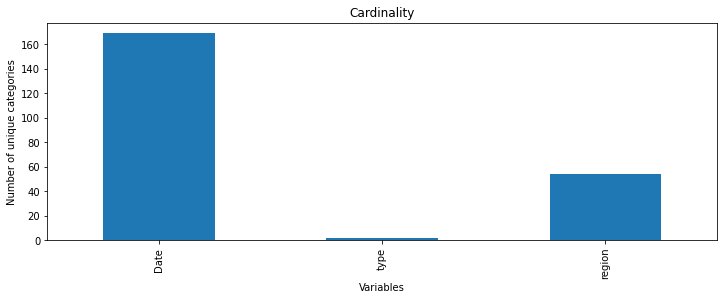

In [2159]:
df[categorical_features].nunique().plot.bar(figsize=(12,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

*Observation:*<br> *type Categorical variable have low cardinality <br> Date,region have high cardinality*

###### Check for Numerical Variable

Text(0.5, 1.0, 'Cardinality')

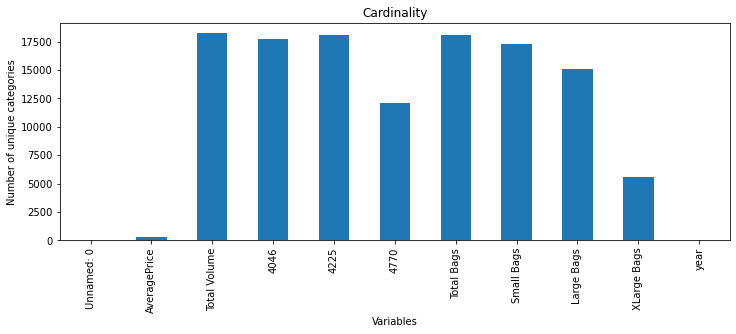

In [2160]:
df[numerical_features].nunique().plot.bar(figsize=(12,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

*Observation:*<br> *All Countinues variable have high cardinality Except year and Average Price*

###### Univariate Analysis

###### for Categorical Variable

###### 1. type variable

<AxesSubplot:ylabel='type'>

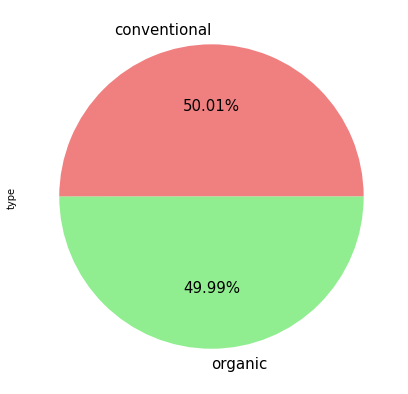

In [2161]:
df['type'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(7,7),colors = ['lightcoral', 'lightgreen'])
#df.groupby(['type']).size().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(7,7),colors = ['lightcoral', 'lightgreen'])

*Observation:*<br> Column type have to categories Organic and Conventional<br> Both the type of Avocado are sold approx equal.

###### 2. region variable

<AxesSubplot:>

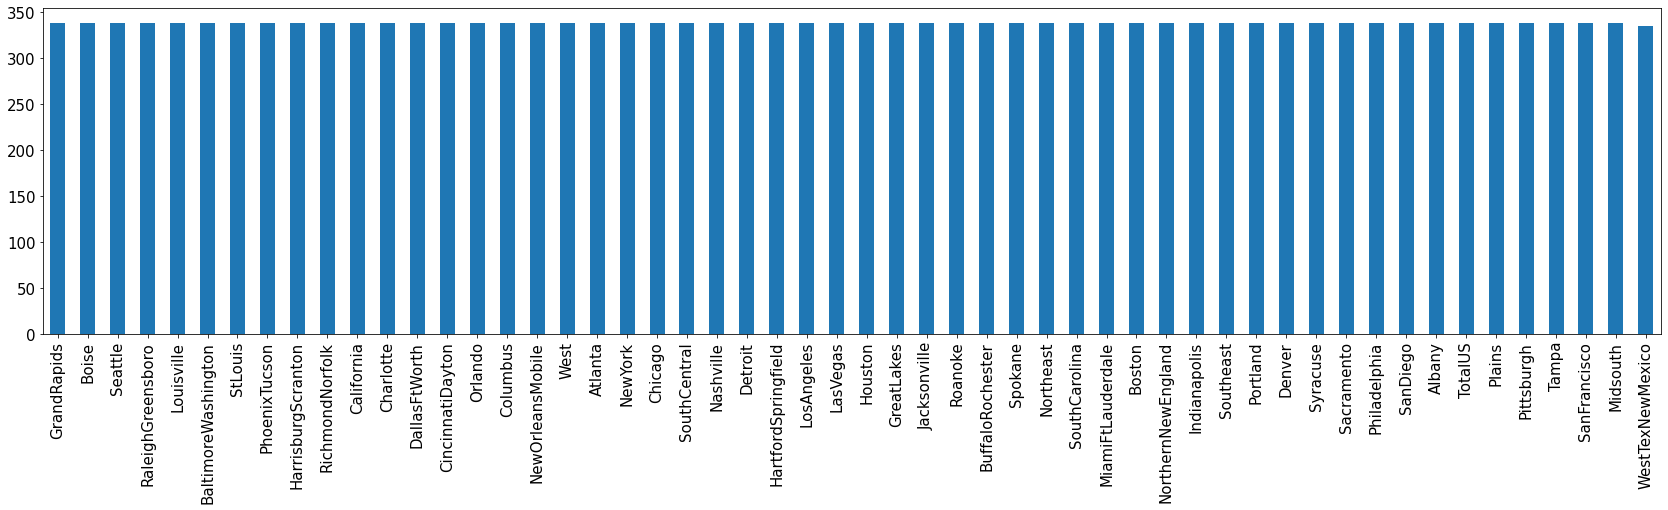

In [1939]:
plt.figure(figsize=(23,4))
df['region'].value_counts().head(54).plot(kind = "bar",fontsize=15,figsize=(29,6))
#df.groupby(['region']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))

*Observation :*<br> *Equal sale in every region.*

###### 3.Date variable

<AxesSubplot:xlabel='Date'>

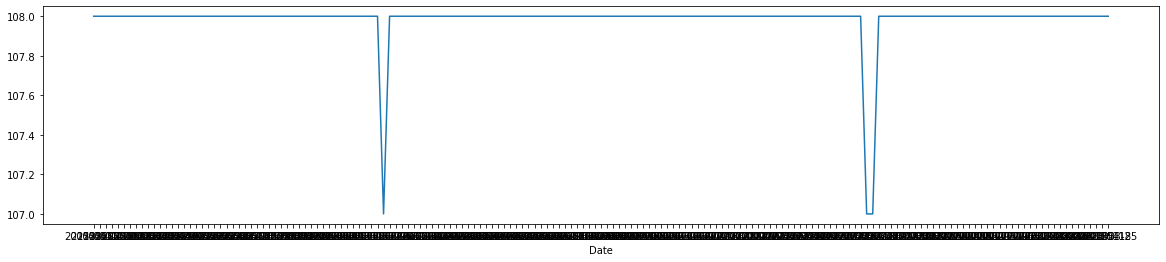

In [1940]:
plt.figure(figsize=(20,4))
result = df.groupby(['Date']).size()
sns.lineplot(x =result.index, y = result.values)

###### for Countinuous Variable

###### 1.Year variable

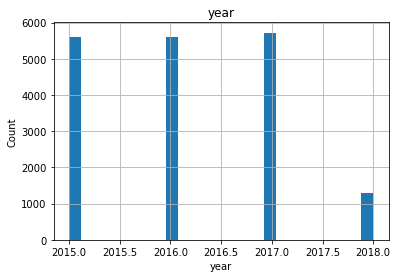

In [1815]:
#plt.figure(figsize=(30,7))
#result = df.groupby(['year']).size()
#sns.lineplot(x = result.index, y = result.values)

df['year'].hist(bins=25)
plt.xlabel('year')
plt.ylabel("Count")
plt.title('year')
plt.show()

###### 2.XLarge Bags variable

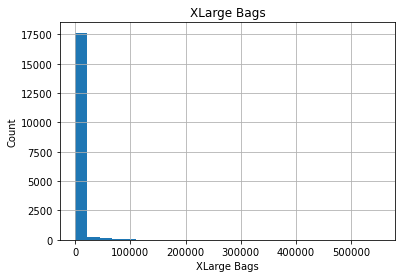

In [1816]:
df['XLarge Bags'].hist(bins=25)
plt.xlabel('XLarge Bags')
plt.ylabel("Count")
plt.title('XLarge Bags')
plt.show()

###### 3. Large Bags variable

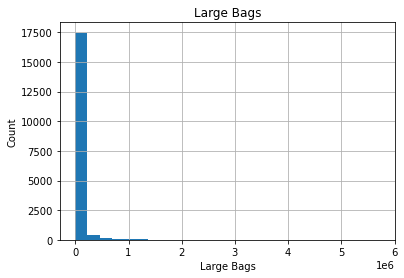

In [1817]:
df['Large Bags'].hist(bins=25)
plt.xlabel('Large Bags')
plt.ylabel("Count")
plt.title('Large Bags')
plt.show()

###### 4. Small Bags Variable

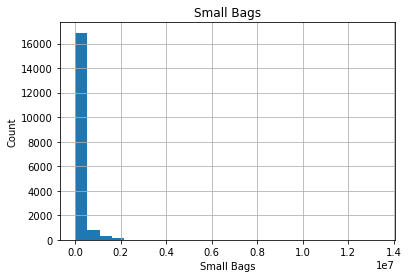

In [1818]:
df['Small Bags'].hist(bins=25)
plt.xlabel('Small Bags')
plt.ylabel("Count")
plt.title('Small Bags')
plt.show()


###### 5. Total Bags Variable

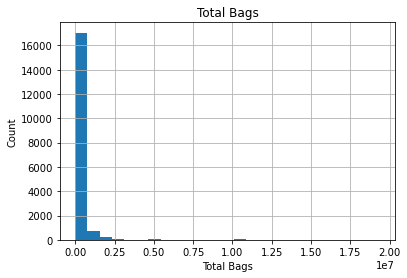

In [1819]:
df['Total Bags'].hist(bins=25)
plt.xlabel('Total Bags')
plt.ylabel("Count")
plt.title('Total Bags')
plt.show()

###### 6. 4770 (PLU code) variable 

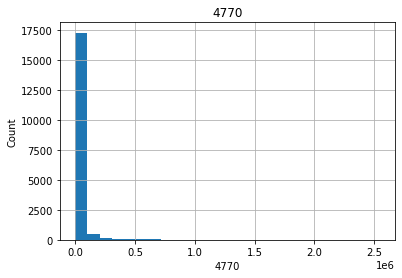

In [1820]:
df['4770'].hist(bins=25)
plt.xlabel('4770')
plt.ylabel("Count")
plt.title('4770')
plt.show()

###### 7. 4225 (PLU code) variable

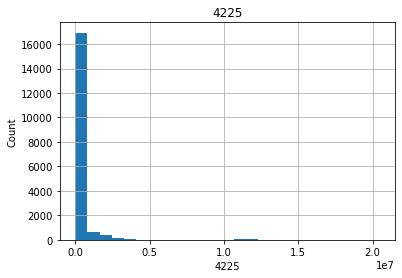

In [1821]:
#df['4225'].plot(kind='line')
#plt.figure(figsize=(35,6))
#result = df.groupby(['4225']).size()
#sns.scatterplot(x = result.index, y = result.values,palette="dark",color=".04")

df['4225'].hist(bins=25)
plt.xlabel('4225')
plt.ylabel("Count")
plt.title('4225')
plt.show()

###### 8. 4046 (PLU code) variable

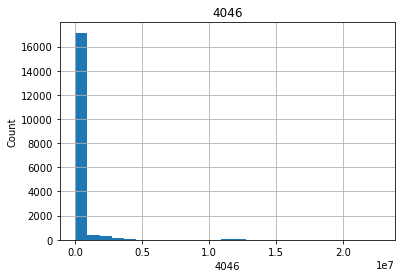

In [1822]:
#df['4046'].plot(kind='hist')
df['4046'].hist(bins=25)
plt.xlabel('4046')
plt.ylabel("Count")
plt.title('4046')
plt.show()

###### 9. Total Volume variable

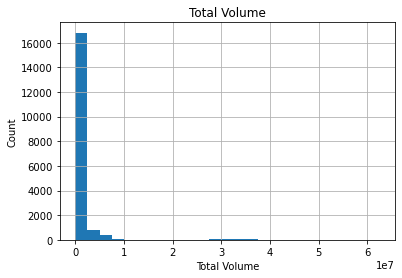

In [1823]:
#df['Total Volume'].value_counts().plot(kind='hist')
df['Total Volume'].hist(bins=25)
plt.xlabel('Total Volume')
plt.ylabel("Count")
plt.title('Total Volume')
plt.show()

###### 10. Average Price variable

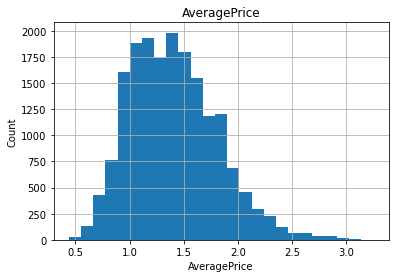

In [1824]:
#plt.figure(figsize=(35,6))
#result = df.groupby(['AveragePrice']).size()
#sns.lineplot(x = result.index, y = result.values, palette="deep",color="purple")
df['AveragePrice'].hist(bins=25)
plt.xlabel('AveragePrice')
plt.ylabel("Count")
plt.title('AveragePrice')
plt.show()

###### Bivariate Analysis

###### 1)continuous Variable and Average Price


###### Total Volume and Average Price

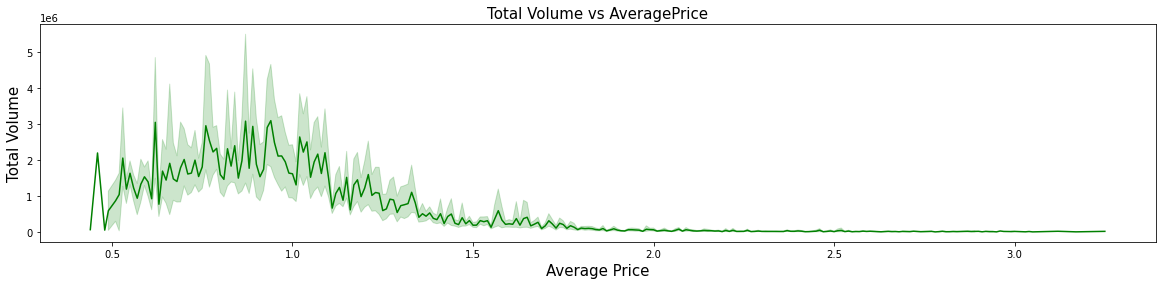

In [1825]:
fig, ax = plt.subplots(figsize = ( 20 ,4))
s=sns.lineplot(data=df,y='Total Volume',x='AveragePrice',color='green',ax = ax)
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "Total Volume" , size = 15 )
ax.set_title( "Total Volume vs AveragePrice" , size = 15 )
plt.show()

###### PLU code 4046 and Average Price

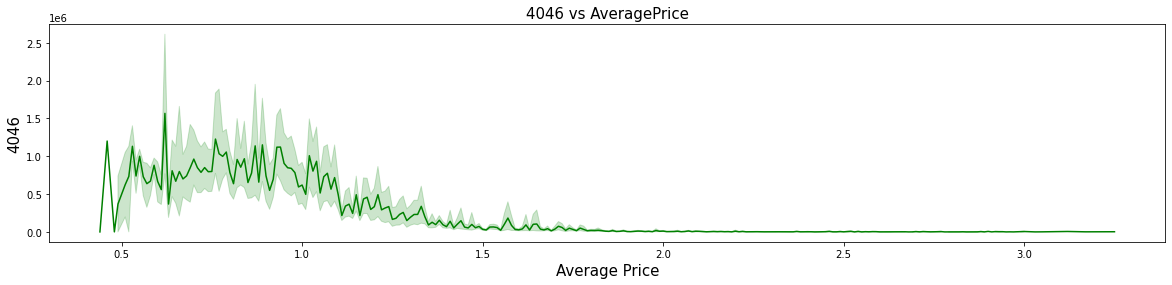

In [1826]:
fig, ax = plt.subplots(figsize = (20,4))
s=sns.lineplot(data=df,y='4046',x='AveragePrice',color='green',ax = ax)
#fig, axes = plt.subplots(figsize=(10,5))
#sns.scatterplot(df['4046'],df['AveragePrice'])
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "4046" , size = 15 )
ax.set_title( "4046 vs AveragePrice" , size = 15 )
plt.show()




###### PLU code 4225 and Average Price

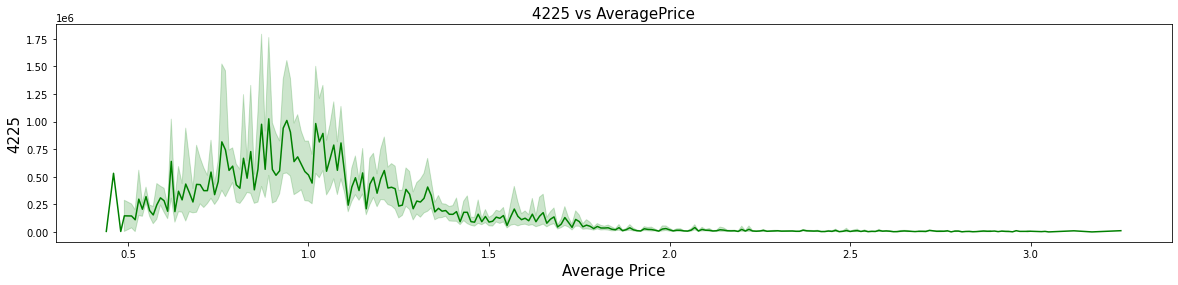

In [1827]:
fig, ax = plt.subplots(figsize = ( 20 ,4))
s=sns.lineplot(data=df,y='4225',x='AveragePrice',color='green',ax = ax)
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "4225" , size = 15 )
ax.set_title( "4225 vs AveragePrice" , size = 15 )
plt.show()

###### PLU code 4770 and Average Price

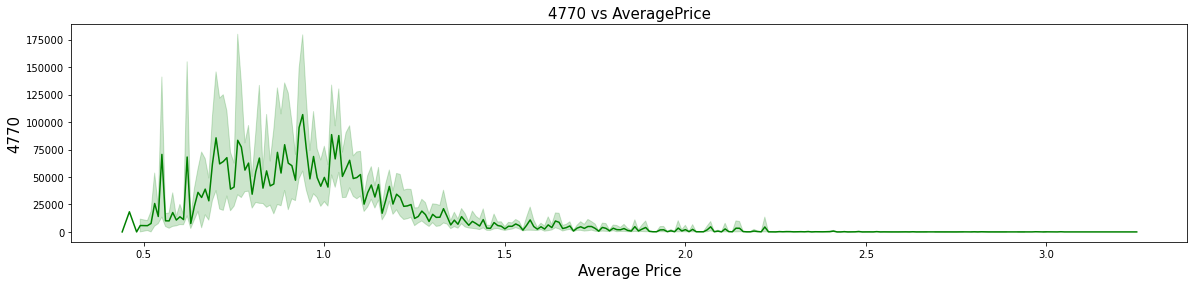

In [1828]:
fig, ax = plt.subplots(figsize = ( 20 ,4))
s=sns.lineplot(data=df,y='4770',x='AveragePrice',color='green',ax = ax)
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "4770" , size = 15 )
ax.set_title( "4770 vs AveragePrice" , size = 15 )
plt.show()

###### Total Bags and Average Price

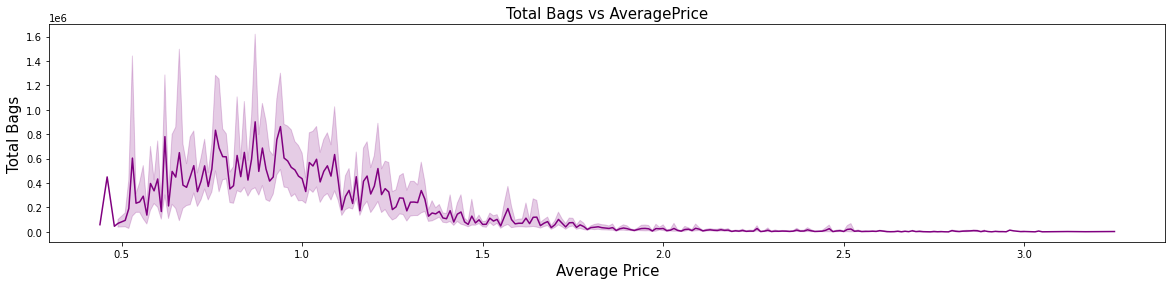

In [1829]:
fig, ax = plt.subplots(figsize = ( 20 ,4))
s=sns.lineplot(data=df,y='Total Bags',x='AveragePrice',color='purple',ax = ax)
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "Total Bags" , size = 15 )
ax.set_title( "Total Bags vs AveragePrice" , size = 15 )
plt.show()

###### Small Bags and Average Price

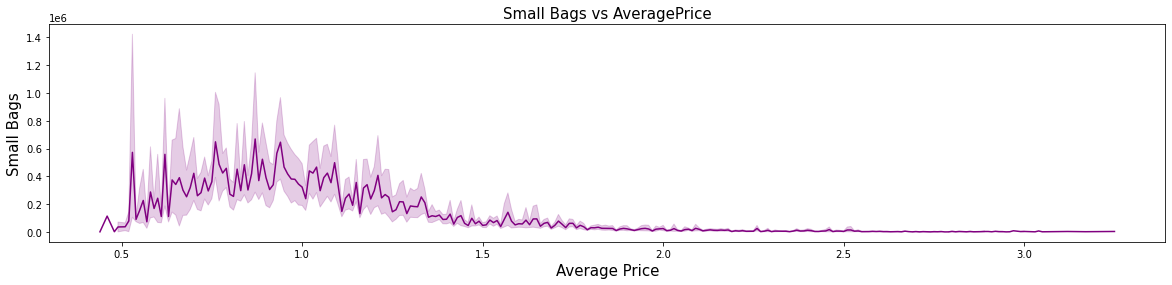

In [1830]:
fig, ax = plt.subplots(figsize = ( 20 ,4))
s=sns.lineplot(data=df,y='Small Bags',x='AveragePrice',color='purple',ax = ax)
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "Small Bags" , size = 15 )
ax.set_title( "Small Bags vs AveragePrice" , size = 15 )
plt.show()

###### Large Bags and Average Price

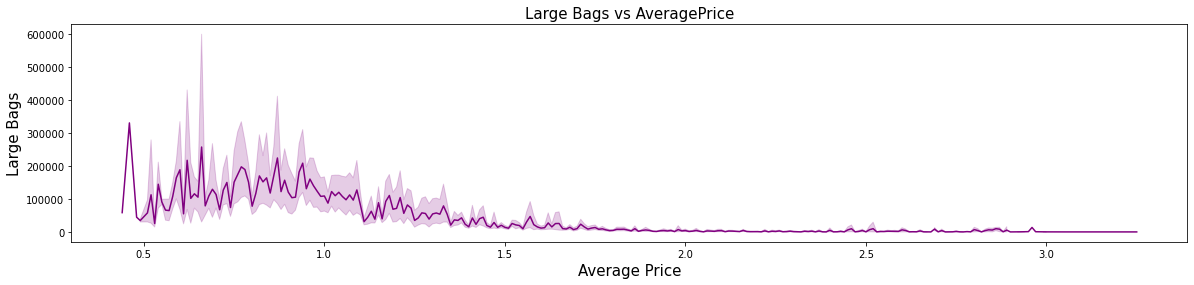

In [1831]:
fig, ax = plt.subplots(figsize = ( 20 ,4))
s=sns.lineplot(data=df,y='Large Bags',x='AveragePrice',color='purple',ax = ax)
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "Large Bags" , size = 15 )
ax.set_title( "Large Bags vs AveragePrice" , size = 15 )
plt.show()

###### XLarge Bags and Average Price

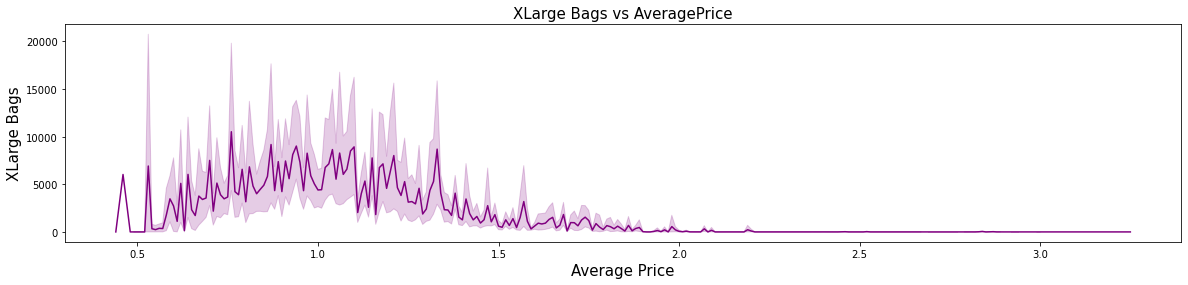

In [1832]:
fig, ax = plt.subplots(figsize = ( 20 ,4))
s=sns.lineplot(data=df,y='XLarge Bags',x='AveragePrice',color='purple',ax = ax)
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "XLarge Bags" , size = 15 )
ax.set_title( "XLarge Bags vs AveragePrice" , size = 15 )
plt.show()

###### 2)Categorical Variable and Average Price

###### Date and AveragePrice Variable

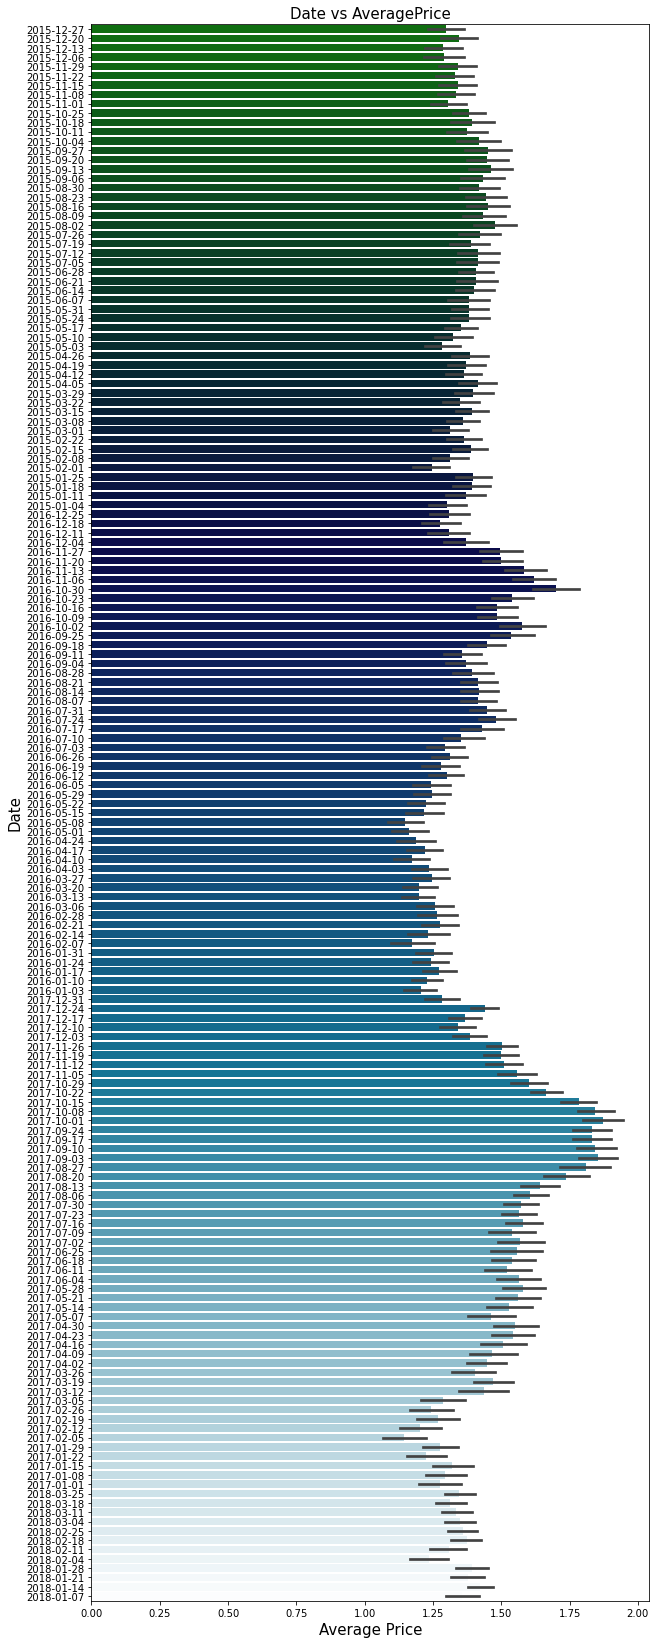

In [1833]:
fig, ax = plt.subplots(figsize = (10 ,29))
s=sns.barplot(data=df,y='Date',x='AveragePrice',color='green',orient = 'h',ax = ax ,palette='ocean')
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "Date" , size = 15 )
ax.set_title( "Date vs AveragePrice" , size = 15 )
plt.show()

*Observation*<br> *There is hicke in Price in the year end of 2016 and 2017*<br> *and Deep in the starting months of the Years.*

###### type and AveragePrice Variable

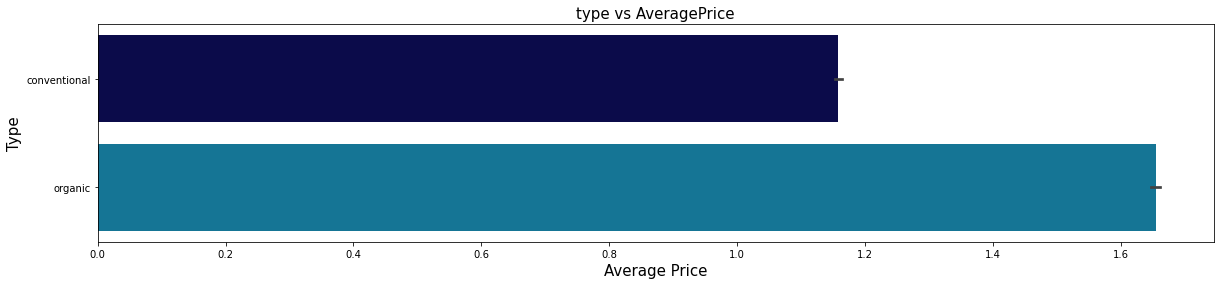

In [1834]:
fig, ax = plt.subplots(figsize = ( 20 ,4))
s=sns.barplot(data=df,y='type',x='AveragePrice',color='green',orient = 'h',ax = ax,palette='ocean' )
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "Type" , size = 15 )
ax.set_title( "type vs AveragePrice" , size = 15 )
plt.show()

*Observation :*<br> *Organic Type Avocado Have high Price. <br> Conventional Avocado have low Price*

###### region and AveragePrice Variable

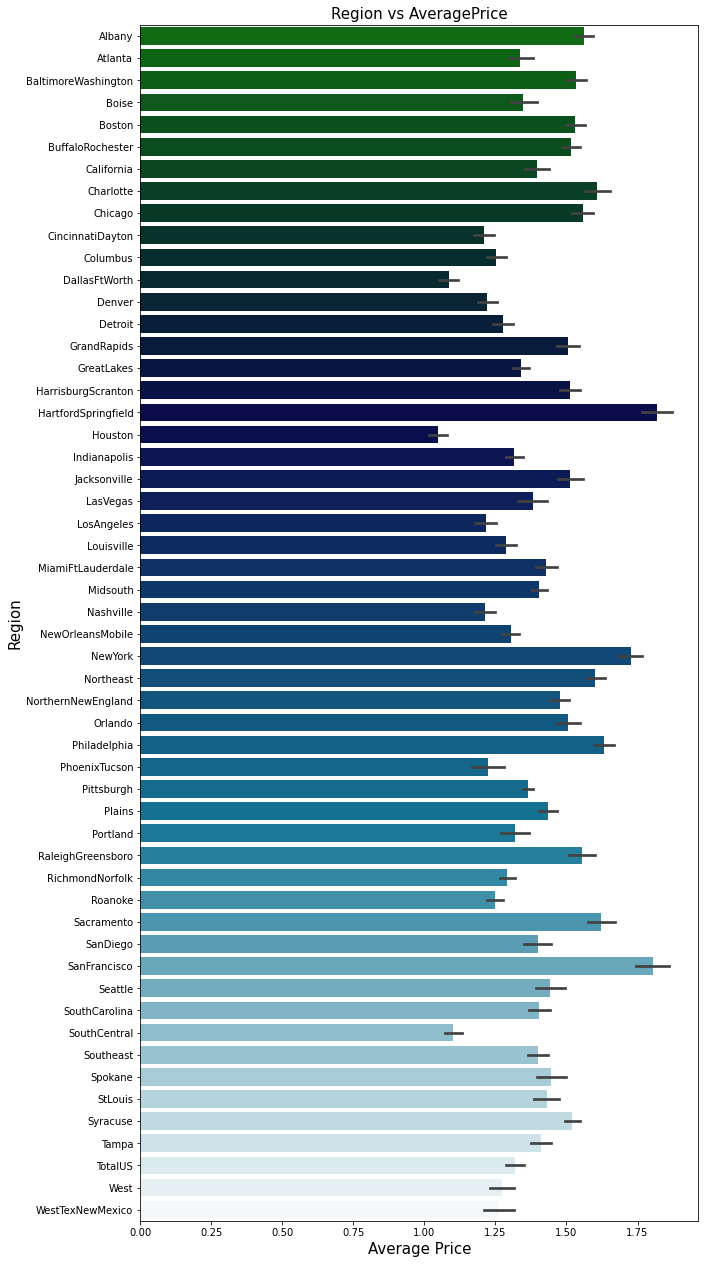

In [1835]:
fig, ax = plt.subplots(figsize = (10 ,22))
s=sns.barplot(data=df,y='region',x='AveragePrice',color='green',orient = 'h',ax = ax ,palette='ocean')
ax.set_xlabel( "Average Price" , size = 15 )
ax.set_ylabel( "Region" , size = 15 )
ax.set_title( "Region vs AveragePrice" , size = 15 )
plt.show()

*Observation :*<br> *HartforthSpringfield, NewYork,Sanfrancisco region have high sale of Avacodo.* <br> *SouthCenter, Houstan, Dallasftwarth region have low sale of Avacado.* <br>
    *Rest have medium sale of Avacado*

In [1836]:
#fig, ax = plt.subplots(figsize = (10 ,5))
#s=sns.scatterplot(data=df,y='Total Volume',x='AveragePrice',hue ='type',ax = ax ,palette='ocean')
#ax.set_xlabel( "Average Price" , size = 15 )
#ax.set_ylabel( "Total Volume" , size = 15 )
#ax.set_title( "Total Volume vs AveragePrice" , size = 15 )
#plt.show()

In [1837]:
 #sns.scatterplot(x=df.index,y=df['4770'],hue=df['Total Volume'])

###### Multivariate Analysis

###### Check for Correlation Among Multiple Variables

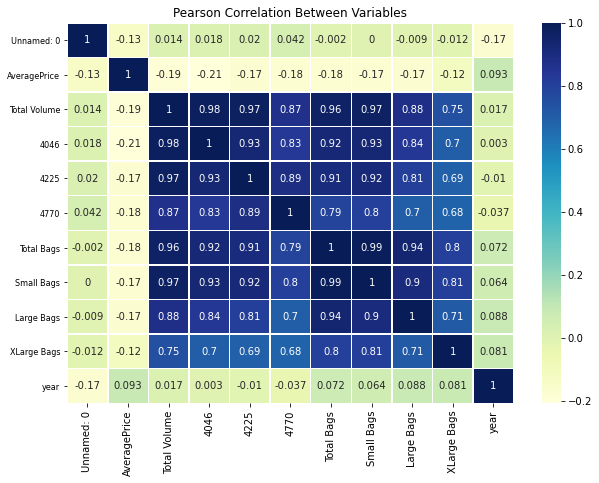

In [1838]:
# Numerical Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(10,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

###### Check for Outliers 

###### Numerical Variable

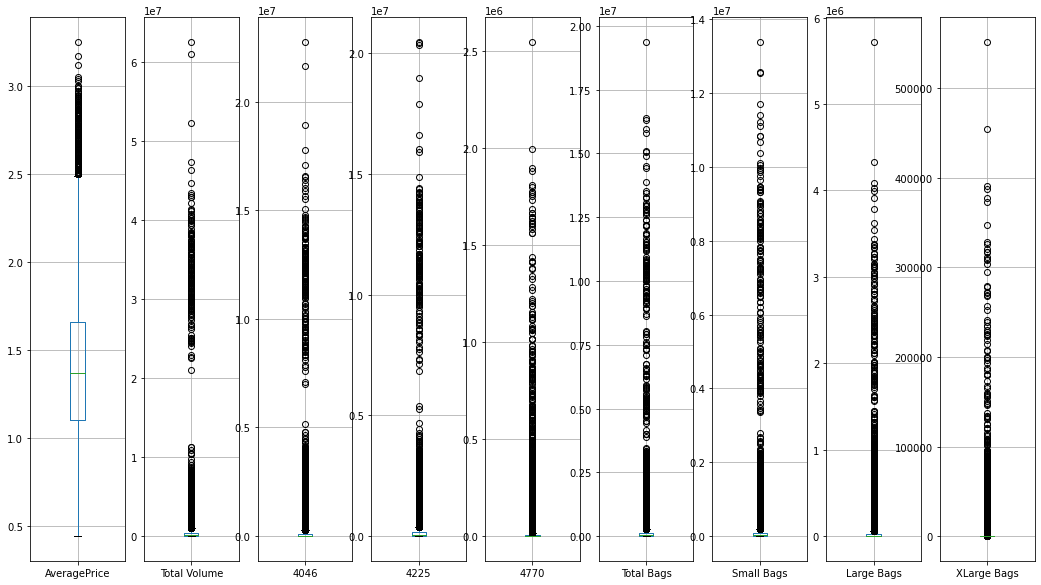

In [2162]:
colslst1=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,10))
for predcol , i in zip(colslst1, range(len(colslst1))):
     df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

*Observation :*<br> *All continuous variables have Outliers.*

###### Check For Skewness

In [2163]:
print(df.skew())
#df.skew().plot(kind='bar')

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64


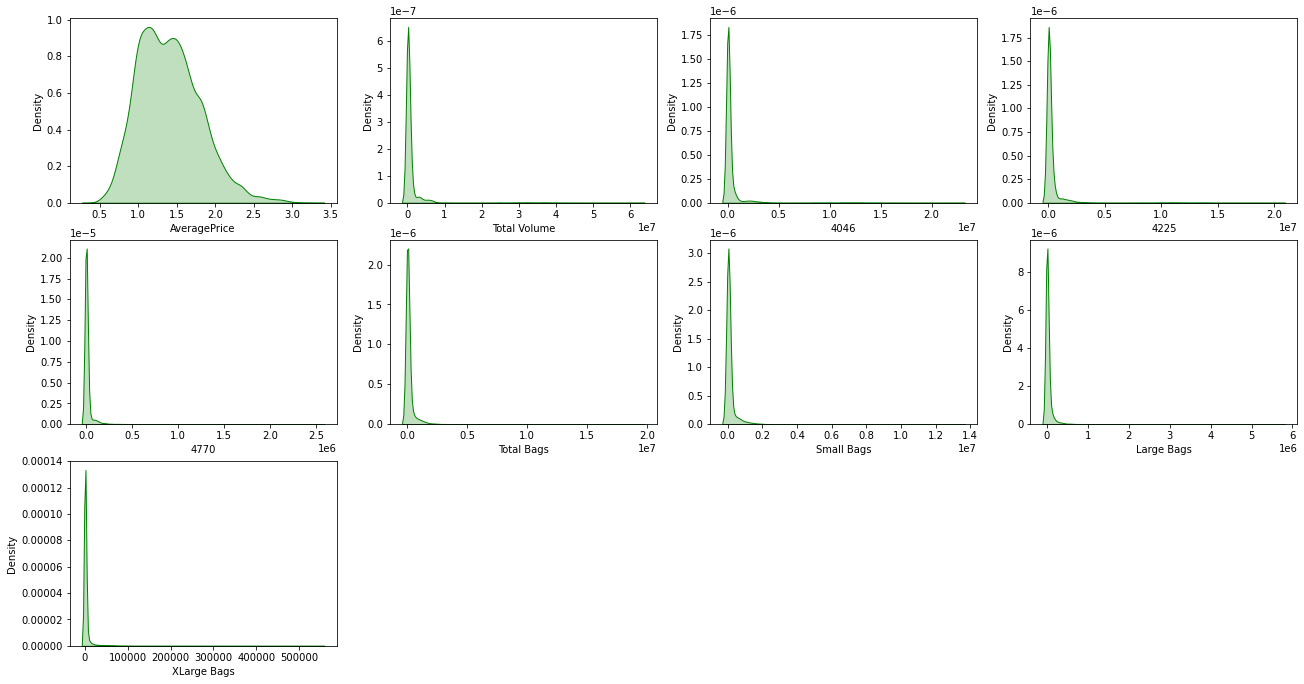

In [2164]:
#Check for Skewness
plt.figure(figsize=(22,36))
plt.subplot(9,4,1)
sns.kdeplot(df['AveragePrice'],color='green',shade=True)
plt.subplot(9,4,2)
sns.kdeplot(df['Total Volume'],color='green',shade=True)
plt.subplot(9,4,3)
sns.kdeplot(df['4046'],color='green',shade=True)
plt.subplot(9,4,4)
sns.kdeplot(df['4225'],color='green',shade=True)
plt.subplot(9,4,5)
sns.kdeplot(df['4770'],color='green',shade=True)
plt.subplot(9,4,6)
sns.kdeplot(df['Total Bags'],color='green',shade=True)
plt.subplot(9,4,7)
sns.kdeplot(df['Small Bags'],color='green',shade=True)
plt.subplot(9,4,8)
sns.kdeplot(df['Large Bags'],color='green',shade=True)
plt.subplot(9,4,9)
sns.kdeplot(df['XLarge Bags'],color='green',shade=True)
plt.show()

*Observation :* <br> *All Numerical variable have Right skewness. <br>AveragePrice, year have less skewnesss. <br> XLarge Bags have max skewness.*

###### Encoding Categorical Variable

In [2165]:
#Date variable converting column into DAys, Months,Years

In [2166]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace = True)
df.drop('year', axis=1, inplace = True)
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [2167]:
# Converting Type variable into Number by labelencoding

In [2168]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
print(df['type'])

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32


In [2169]:
df.shape

(18249, 15)

In [2170]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,Albany,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,Albany,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,Albany,2015,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,Albany,2015,11,29


In [2171]:
#Renaming Columns 4046,4225,4770

In [2172]:
df.rename(columns = {'4046':'PLUCode4046','4225':'PLUCode4225','4770':'PLUCode4770'}, inplace = True)

In [2173]:
#converting region variable into number by encoding

In [2174]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
print(df['region'])

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32


In [2184]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,PLUCode4046,PLUCode4225,PLUCode4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29


In [2177]:
df.shape

(18249, 15)

In [2178]:
#Handling Outliers

In [2179]:
fout =['AveragePrice','Total Volume','PLUCode4046','PLUCode4225','PLUCode4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

In [ ]:
#Recheck for outliers

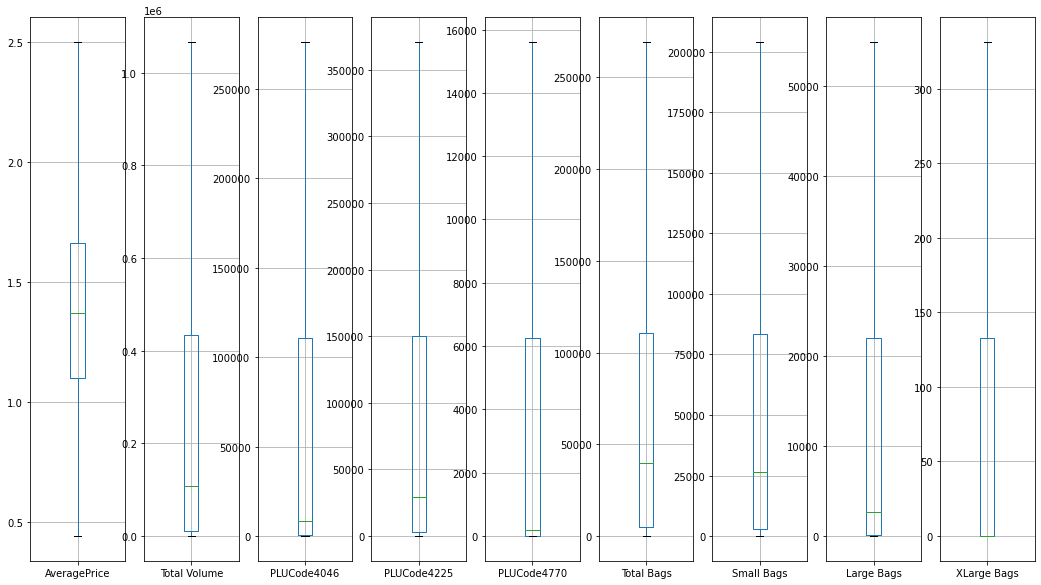

In [2183]:
colslst1=['AveragePrice','Total Volume','PLUCode4046','PLUCode4225','PLUCode4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,10))
for predcol , i in zip(colslst1, range(len(colslst1))):
     df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

*Observation :*<br>*All Outliers are removed*

###### Handling Cardinality

In [2060]:
df["Total Volume"]=df["Total Volume"].round(0)
df["PLUCode4046"]=df["PLUCode4046"].round(0)
df["PLUCode4225"]=df["PLUCode4225"].round(0)
df["PLUCode4770"]=df["PLUCode4770"].round(0)
df["Total Bags"]=df["Total Bags"].round(0)
df["Small Bags"]=df["Small Bags"].round(0)
df["Large Bags"]=df["Large Bags"].round(0)
df["XLarge Bags"]=df["XLarge Bags"].round(0)

In [2061]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,PLUCode4046,PLUCode4225,PLUCode4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64237.0,1037.0,54455.0,48.0,8697.0,8604.0,93.0,0.0,0,0,2015,12,27
1,1,1.35,54877.0,674.0,44639.0,58.0,9506.0,9408.0,97.0,0.0,0,0,2015,12,20
2,2,0.93,118220.0,795.0,109150.0,130.0,8145.0,8042.0,103.0,0.0,0,0,2015,12,13
3,3,1.08,78992.0,1132.0,71976.0,73.0,5811.0,5677.0,134.0,0.0,0,0,2015,12,6
4,4,1.28,51040.0,941.0,43838.0,76.0,6184.0,5986.0,198.0,0.0,0,0,2015,11,29


In [2062]:
#Recheck Cardinality

Text(0.5, 1.0, 'Cardinality')

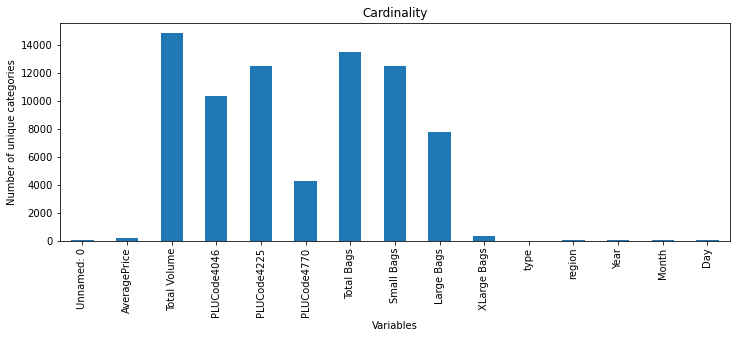

In [2063]:
df.nunique().plot.bar(figsize=(12,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [2064]:
df.shape

(18249, 15)

###### Handling Zero in the Dataset

In [2065]:
df.drop(df[df['Total Bags']==0].index,inplace=True,axis=0)
df.drop(df[df['Large Bags']==0].index,inplace=True,axis=0)
df.drop(df[df['Small Bags']==0].index,inplace=True,axis=0)
df.drop(df[df['PLUCode4225']==0].index,inplace=True,axis=0)
df.drop(df[df['PLUCode4046']==0].index,inplace=True,axis=0)

df.drop(['Unnamed: 0'],inplace=True, axis=1)
df.drop(['XLarge Bags'],inplace=True, axis=1)
df.drop(['PLUCode4770'],inplace=True, axis=1)

In [2066]:
df.shape

(15519, 12)

In [2067]:
#Recheck for Zeros
df[df==0].count()/df.shape[0]*100   

AveragePrice     0.000000
Total Volume     0.000000
PLUCode4046      0.000000
PLUCode4225      0.000000
Total Bags       0.000000
Small Bags       0.000000
Large Bags       0.000000
type            56.414717
region           1.179200
Year             0.000000
Month            0.000000
Day              0.000000
dtype: float64

In [2068]:
df.shape

(15519, 12)

###### Removing Skewness

In [2070]:
df[['Total Volume']]= np.cbrt(df[['Total Volume']])
df[['PLUCode4046']]= np.cbrt(df[['PLUCode4046']])
df[['PLUCode4225']]= np.cbrt(df[['PLUCode4225']])
df[['Total Bags']]= np.cbrt(df[['Total Bags']])
df[['Small Bags']]= np.cbrt(df[['Small Bags']])
df[['Large Bags']]= np.cbrt(df[['Large Bags']])


In [2071]:
df.shape

(15519, 12)

In [2073]:
#Recheck Skewness
print(df.skew())
#df.skew().plot(kind='bar')

AveragePrice    0.574479
Total Volume    0.194394
PLUCode4046     0.318273
PLUCode4225     0.253077
Total Bags      0.065393
Small Bags      0.020458
Large Bags      0.261218
type            0.258752
region          0.010716
Year            0.125579
Month           0.098146
Day             0.011799
dtype: float64


In [2074]:
df.shape

(15519, 12)

In [ ]:
#Feature Selection

In [2076]:
# Anova Test 
sp=[]
for i in df.columns:
    cg=df.groupby('AveragePrice')[i].apply(list)
    av=stats.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        sp.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')


AveragePrice ------correlated------: 0.0 

Total Volume ------correlated------: 0.0 

PLUCode4046 ------correlated------: 0.0 

PLUCode4225 ------correlated------: 0.0 

Total Bags ------correlated------: 0.0 

Small Bags ------correlated------: 0.0 

Large Bags ------correlated------: 0.0 

type ------correlated------: 0.0 

region ------correlated------: 0.008694239829112493 

Year ------correlated------: 3.6912970776642884e-88 

Month ------correlated------: 1.7427527223477802e-72 

Day ------correlated------: 0.0008677589446008957 



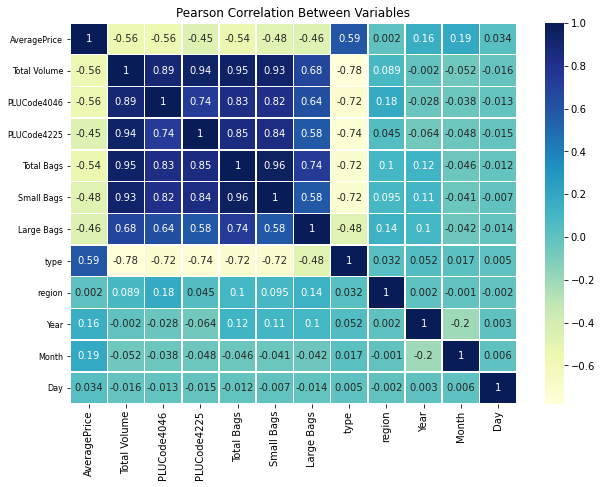

In [2077]:
# Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(10,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        
    

In [2078]:
#Correlation with the output variable
cor = df.corr()
ctarget = abs(cor['AveragePrice'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('\nweak correlated :',result2)

strong correlated : ['AveragePrice', 'Total Volume', 'PLUCode4046', 'PLUCode4225', 'Total Bags', 'Small Bags', 'Large Bags', 'type']

weak correlated : ['region', 'Year', 'Month', 'Day']


In [2079]:
df.head()

,AveragePrice,Total Volume,PLUCode4046,PLUCode4225,Total Bags,Small Bags,Large Bags,type,region,Year,Month,Day
0,1.33,40.049314,10.121843,37.903495,20.564737,20.491172,4.530655,0,0,2015,12,27
1,1.35,38.001154,8.767719,35.473564,21.183576,21.110528,4.594701,0,0,2015,12,20
2,0.93,49.079145,9.263797,47.790464,20.120111,20.034939,4.687548,0,0,2015,12,13
3,1.08,42.906956,10.421946,41.597054,17.978369,17.839101,5.117230,0,0,2015,12,6
4,1.28,37.093990,9.799334,35.260103,18.355089,18.157062,5.828477,0,0,2015,11,29


In [2080]:
df.shape

(15519, 12)

In [2083]:
y_train=df[['AveragePrice']]
X_train=df.drop(['AveragePrice'],axis=1)

y_train.shape

(15519, 1)

In [2108]:
#Normalization 
X_train=power_transform(x_train,method='yeo-johnson')
X_train

array([[-1.54805759, -1.35307766, -1.26381643, ...,  0.86272176,
        -1.57039395, -0.84554676],
       [-0.074892  ,  0.46749486, -0.03865318, ..., -1.3263156 ,
        -0.2990508 ,  1.70857   ],
       [ 1.42460865,  1.35754747,  1.00423336, ...,  0.86272176,
        -0.2990508 ,  0.6092343 ],
       ...,
       [ 0.08661477, -0.55728565,  0.0778191 , ...,  1.83591098,
        -1.20973792,  1.05172258],
       [-0.03422245, -0.64873587,  0.27189499, ...,  0.86272176,
        -0.2990508 , -0.16904673],
       [-1.13917241, -0.82189714, -0.90059676, ..., -0.18218053,
         1.30720636,  0.49815525]])

In [2109]:
# dividing the dataset in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6546, 11)
(6546, 1)
(2183, 11)
(2183, 1)


In [2110]:
# Sandardization of data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[ 0.66618691  0.959743    0.88502285 ... -1.29023085 -0.23963411
  -1.54367495]
 [-1.34524917 -1.15183184 -1.88556658 ...  0.84945957 -1.6577309
   0.73955538]
 [ 0.19253505  0.51307     0.22891848 ...  0.84945957  0.8044207
   0.93749258]
 ...
 [-1.04288624 -0.73653673 -1.1416738  ...  1.9166406  -0.87177684
   1.03481526]
 [-1.55970911 -1.4244839  -1.24456928 ... -0.21949275  1.03637527
   0.11440949]
 [ 0.86263237  0.0997864   1.35221952 ... -0.21949275  0.8044207
  -1.38666438]]
[[ 1.13163635  1.04482277  1.36030109 ... -1.30522498  1.25690388
   0.01577353]
 [ 1.37689075  1.32860633  1.36030109 ... -1.30522498  1.0346481
   1.0364037 ]
 [ 1.37689075  1.15210001  1.36030109 ... -0.22183689  0.04651469
  -0.322353  ]
 ...
 [ 1.37689075  1.32860633  1.36030109 ... -0.22183689  0.80389465
   1.0364037 ]
 [-1.02930461 -0.70864042 -0.87043313 ... -0.22183689 -0.86362309
  -1.0750608 ]
 [-1.04757517 -0.60549926 -0.6215128  ... -1.30522498  0.04651469
   0.64405789]]


###### MOdel Building

In [ ]:
#Linear Regression

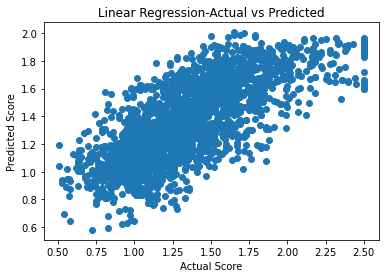

Score On Train Data: 0.558271450215988
Score On Test Data: 0.5356523333844243
Mean Absolute Error: 0.20258595505223506
Mean Squared Error: 0.06652009197868589
Root Mean Squared Error: 0.2579148928981921

Cross Validation
Linear Regression Score: [1. 1. 1. 1. 1.]
Average LinearRegression score: 1.0


In [2111]:
# MOdel Building using Linear Regression
LRregressor = LinearRegression()
LRregressor.fit(x_train, y_train)
y_pred = LRregressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()

# Calculating R2 Score
r2_score_train =LRregressor.score(x_train, y_train)
print('Score On Train Data:',r2_score_train)
r2_score_test=LRregressor.score(x_test,y_test)
print('Score On Test Data:',r2_score_test)

LRtrain=r2_score_train
LRtest=r2_score_test

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

scores = cross_val_score(LRregressor,df, y, cv=5)
print('\nCross Validation')
print('Linear Regression Score:',scores)
LRcross=round(scores.mean(),4)
print('Average LinearRegression score:',round(scores.mean(),4))



In [ ]:
#LAsso

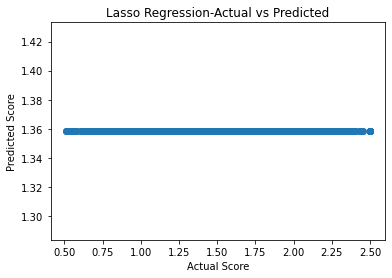


r2 Score On Train Data: 0.0

r2 Score On Test Data: -0.0006570104515328801


Mean Absolute Error: 0.3030270215686332

Mean Squared Error: 0.1433490489130845

Root Mean Squared Error: 0.378614644345784

Cross Validation
Lasso Regression Score: [-1.17741435  0.01373185  0.21594375 -0.02758235 -0.33848465]
Average Lasso Regression score: -0.2628


In [2112]:
regressor = Lasso()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])


# Plot outputs

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Lasso Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

LStrain=r2_score_train
LStest=r2_score_test
print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Lasso Regression Score:',scores)

LScross=round(scores.mean(),4)
print('Average Lasso Regression score:',round(scores.mean(),4))

In [ ]:
#Decision TRee

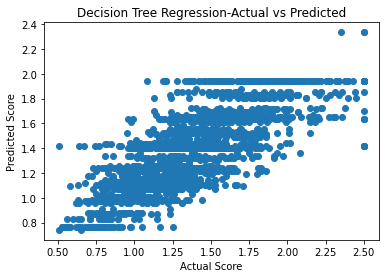


r2 Score On Train Data: 0.655093832279388

r2 Score On Test Data: 0.6083878990033871


Mean Absolute Error: 0.1813974023416392

Mean Squared Error: 0.05610036369543657

Root Mean Squared Error: 0.23685515340696425

Cross Validation
Decision Tree Regression Score: [0.99830596 0.99911693 0.99938056 0.99935976 0.99930523]
Average Decision Tree Regression score: 0.9991


In [2113]:
regressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

DStrain=r2_score_train
DStest=r2_score_test

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Decision Tree Regression Score:',scores)

DScross=round(scores.mean(),4)
print('Average Decision Tree Regression score:',round(scores.mean(),4))


###### Model Building BY using Random Forest

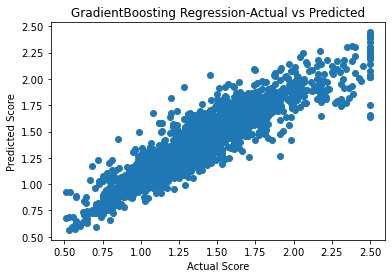


r2 Score On Train Data: 0.9781421222048289

r2 Score On Test Data: 0.8464500488200919


Mean Absolute Error: 0.10690201557489691

Mean Squared Error: 0.02199678734310582

Root Mean Squared Error: 0.14831313948233252

Cross Validation
Gradient Boosting Regression Score: [0.99999903 0.9999997  0.99999852 0.99999991 0.99998633]
Average Gradient Boosting Regression score: 1.0


In [2114]:
RMregressor = RandomForestRegressor()
RMregressor.fit(x_train, y_train)
y_pred = RMregressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('GradientBoosting Regression-Actual vs Predicted')
plt.show()



#Evaluation for the Model
#R2 Score
r2_score_train =RMregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=RMregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

RMtrain=r2_score_train
RMtest=r2_score_test

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


#Vaditaion for the Model

scores = cross_val_score(RMregressor,df, y, cv=5)
print('\nCross Validation')
print('Gradient Boosting Regression Score:',scores)

RMcross=round(scores.mean(),4)
print('Average Gradient Boosting Regression score:',round(scores.mean(),4))


In [2115]:
#Gradiant Boosting

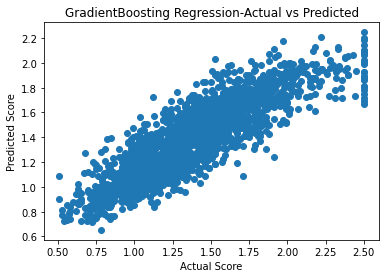


r2 Score On Train Data: 0.7776693860819908

r2 Score On Test Data: 0.7466519669009382


Mean Absolute Error: 0.14647866896070383

Mean Squared Error: 0.03629335447553955

Root Mean Squared Error: 0.1905081480555085

Cross Validation
Gradient Boosting Regression Score: [0.99983444 0.99992916 0.99994595 0.99991654 0.99993428]
Average Gradient Boosting Regression score: 0.9999


In [2116]:
regressor = GradientBoostingRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('GradientBoosting Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)
GBtrain=r2_score_train
GBtest=r2_score_test

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Gradient Boosting Regression Score:',scores)
GBcross=round(scores.mean(),4)
print('Average Gradient Boosting Regression score:',round(scores.mean(),4))


In [ ]:
#Model Comperition

In [2117]:
trainscore=[LRtrain,LStrain,DStrain,RMtrain,GBtrain]
testscore=[LRtest,LStest,DStest,RMtest,GBtest]
VAlscore=[LRcross,LScross,DScross,RMcross,GBcross]
col={'Train Score':trainscore,'Test Score':testscore,'Validation':VAlscore}
models=['Linear Regression','Lasso','Decision Tree','Random Forest','Gradient Boosting']
dfp=pd.DataFrame(data=col,index=models)
dfp

,Train Score,Test Score,Validation
Linear Regression,0.558271,0.535652,1.0000
Lasso,0.000000,-0.000657,-0.2628
Decision Tree,0.655094,0.608388,0.9991
Random Forest,0.978142,0.846450,1.0000
Gradient Boosting,0.777669,0.746652,0.9999


<AxesSubplot:>

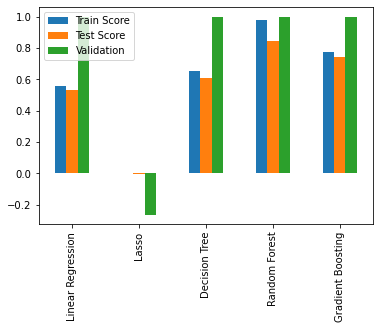

In [2118]:
dfp.plot(kind='bar')

In [2119]:
#Hyperparameter tuning for Linear Regression

In [2120]:
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
positive=[True,False]
n_jobs= [1,5,10, 100,200,500]
param_distributions = dict(fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           positive=positive,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=LRregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score:  0.5552269744859392
Best Params:  {'positive': False, 'normalize': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


In [2121]:
#Hyperparameter Tuning for Random forest

In [2122]:
n_estimators=[10, 50,5,90, 200, 110, 500]
criterion = ['mse','mae']
max_depth = [2,4,6,8,10]
min_samples_split=[1,5,3,1.5,3.9,10]
min_samples_leaf=[1.4,3,2.6,9.3,1.5]
min_weight_fraction_leaf=[1.4,3.5,1.2,0.5]
max_features=['auto','sqrt','log2']
max_leaf_nodes=[4,6,12,10,25,50]
verbose = [1,5,4,10,15]
random_state= [1,5,10, 100,200,500]
n_jobs= [1,5,10, 100,200]

param_distributions = dict(n_estimators=n_estimators,
                           criterion = criterion,
                           max_depth = max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           max_leaf_nodes=max_leaf_nodes,
                           verbose = verbose,
                           random_state= random_state,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=RMregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=100)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200building tree 8 of 200

building tree 9 of 200building tree 10 of 200

building tree 11 of 200
building tree 12 of 200building tree 13 of 200

building tree 14 of 200
building tree 15 of 200building tree 16 of 200
building tree 17 of 200

building tree 18 of 200building tree 19 of 200

building tree 20 of 200
building tree 21 of 200
building tree 22 of 200building tree 23 of 200

building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200building tree 33 of 200

building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200building tree 38 of 200
building tree 39 of 200

building tree 40 of 200
building tree 41 of 200building tree 42 of 200bui

[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:    0.2s


building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200building tree 136 of 200

building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200building tree 146 of 200

building tree 147 of 200
building tree 148 of 200building tree 149 of 200
building tree 150 of 200

building tree 151 of 200
building tree 152 of 200
building tree 153 of 200building tree 154 of 200
building tree 155 of 200

building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200building tree 163 of 200

building tree 164 of 200building tree 165 of 200

building tree 166 of 200building tree 167 of 200

building tree 168 of 200
building tree 169 of 200


[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    0.5s finished


In [2129]:
# Linear Regression As Final Model

In [2130]:
#Retraining MOdel

In [2135]:
x = df.iloc[:,:10]
y = df.iloc[:,0]
PScaler=StandardScaler()
PScalerFit=PScaler.fit(x)

X=PScalerFit.transform(x)

print(X.shape)
print(y.shape)


(15519, 10)
(15519,)


In [2136]:
regressor =LinearRegression(positive= False,normalize=True,n_jobs=1,fit_intercept=True,copy_X=True)
Final_Model=regressor.fit(X,y)

# Calculating R2 Score
r2_score =regressor.score(X, y)
print('Final Score:',r2_score)


Final Score: 1.0


In [ ]:
#Model Saving

In [2137]:
import pickle
filename='AvocadoPricePred.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
